# Deep dive into zipline

## Importing libraries

In [1]:
%load_ext watermark

In [2]:
%load_ext zipline

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 그래프를 더 높은 해상도로 출력

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
from trading_calendars import get_calendar
# from yahoofinancials import YahooFinancials
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
%watermark --iversions

pandas  0.22.0
numpy   1.14.3
zipline 1.3.0



## Basic Example

In [6]:
%%zipline --start 2019-1-2 --end 2019-12-30 --capital-base 200 --bundle krx_futures -o zl_basic.pkl --trading-calendar XKRX

# imports
from zipline.api import order_percent, order, record, symbol, set_benchmark, set_slippage
from zipline.finance import commission, slippage

# parameters
SELECTED_STOCK = 'LKTB'
n_stocks_to_buy = 1 # order_percent 로 변경하며 주석처리

def initialize(context):
    set_benchmark(symbol('LKTB'))
    context.asset = symbol(SELECTED_STOCK)
    context.has_ordered = False
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.set_slippage(slippage.FixedSlippage(spread=0))

def handle_data(context, data):
    
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(context.asset, n_stocks_to_buy)
        #order_percent(context.asset, 1)
        # setting up a flag for holding a position
        context.has_ordered = True
        
    # record price for further inspection
    record(price=data.current(context.asset, 'price'))

/opt/conda/envs/backtest/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/conda/envs/backtest/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


algo_volatility  algorithm_period_return     alpha  \
2019-01-02 06:30:00+00:00              NaN                 0.000000       NaN   
2019-01-03 06:30:00+00:00         0.000000                 0.000000  0.000000   
2019-01-04 06:30:00+00:00         0.003208                -0.000350 -0.026475   
2019-01-07 06:30:00+00:00         0.005670                -0.001100 -0.029597   
2019-01-08 06:30:00+00:00         0.006623                -0.002000 -0.024034   
2019-01-09 06:30:00+00:00         0.007271                -0.001750 -0.006420   
2019-01-10 06:30:00+00:00         0.010677                -0.000650  0.012836   
2019-01-11 06:30:00+00:00         0.012148                -0.002000  0.009462   
2019-01-14 06:30:00+00:00         0.015541                -0.000250  0.013809   
2019-01-15 06:30:00+00:00         0.014889                 0.000250  0.013274   
2019-01-16 06:30:00+00:00         0.014347                -0.000250  0.011350   
2019-01-17 06:30:00+00:00         0.013719                -0.000500  0.010088   
2019-01-18 06:30:00+00:00         0.015715                -0.002500  0.008281   
2019-01-21 06:30:00+00:00         0.015397                -0.003400  0.007307   
2019-01-22 06:30:00+00:00         0.017255                -0.001500  0.008069   
2019-01-23 06:30:00+00:00         0.016728                -0.001250  0.007673   
2019-01-24 06:30:00+00:00         0.016210                -0.001500  0.007113   
2019-01-25 06:30:00+00:00         0.015802                -0.002000  0.006531   
2019-01-28 06:30:00+00:00         0.015561                -0.002800  0.005946   
2019-01-29 06:30:00+00:00         0.015693                -0.004100  0.005390   
2019-01-30 06:30:00+00:00         0.015374                -0.004750  0.004997   
2019-01-31 06:30:00+00:00         0.018001                -0.002050  0.005597   
2019-02-01 06:30:00+00:00         0.017783                -0.001350  0.005501   
2019-02-07 06:30:00+00:00         0.017438                -0.001800  0.005185   
2019-02-08 06:30:00+00:00         0.017836                -0.000250  0.005291   
2019-02-11 06:30:00+00:00         0.018057                 0.001200  0.005369   
2019-02-12 06:30:00+00:00         0.018491                -0.000500  0.004868   
2019-02-13 06:30:00+00:00         0.018216                -0.001050  0.004616   
2019-02-14 06:30:00+00:00         0.017945                -0.000600  0.004519   
2019-02-15 06:30:00+00:00         0.017879                 0.000400  0.004509   
...                                    ...                      ...       ...   
2019-11-18 06:30:00+00:00         0.027200                 0.007945  0.000378   
2019-11-19 06:30:00+00:00         0.027303                 0.010800  0.000362   
2019-11-20 06:30:00+00:00         0.027457                 0.014100  0.000349   
2019-11-21 06:30:00+00:00         0.027405                 0.013450  0.000349   
2019-11-22 06:30:00+00:00         0.027358                 0.012645  0.000348   
2019-11-25 06:30:00+00:00         0.027351                 0.011050  0.000350   
2019-11-26 06:30:00+00:00         0.027324                 0.012400  0.000345   
2019-11-27 06:30:00+00:00         0.027327                 0.014250  0.000339   
2019-11-28 06:30:00+00:00         0.027266                 0.014250  0.000338   
2019-11-29 06:30:00+00:00         0.027249                 0.015800  0.000335   
2019-12-02 06:30:00+00:00         0.027455                 0.012200  0.000334   
2019-12-03 06:30:00+00:00         0.027465                 0.010350  0.000337   
2019-12-04 06:30:00+00:00         0.027792                 0.014850  0.000321   
2019-12-05 06:30:00+00:00         0.027733                 0.014700  0.000320   
2019-12-06 06:30:00+00:00         0.027719                 0.013200  0.000320   
2019-12-09 06:30:00+00:00         0.027699                 0.014700  0.000316   
2019-12-10 06:30:00+00:00         0.027661                 0.015850  0.000314   
2019-12-11 06:30:00+00:00         0.027605                

In [7]:
# read the performance summary dataframe
zl_basic = pd.read_pickle('zl_basic.pkl')

In [8]:
zl_basic.to_csv("zl_basic_200.csv")

In [14]:
zl_basic

algo_volatility  algorithm_period_return     alpha  \
2019-01-02 00:00:00+00:00              NaN                 0.000000       NaN   
2019-01-03 00:00:00+00:00         0.000000                 0.000000  0.000000   
2019-01-04 00:00:00+00:00         0.003208                -0.000350 -0.026475   
2019-01-07 00:00:00+00:00         0.005670                -0.001100 -0.029597   
2019-01-08 00:00:00+00:00         0.006623                -0.002000 -0.024034   
2019-01-09 00:00:00+00:00         0.007271                -0.001750 -0.006420   
2019-01-10 00:00:00+00:00         0.010677                -0.000650  0.012836   
2019-01-11 00:00:00+00:00         0.012148                -0.002000  0.009462   
2019-01-14 00:00:00+00:00         0.015541                -0.000250  0.013809   
2019-01-15 00:00:00+00:00         0.014889                 0.000250  0.013274   
2019-01-16 00:00:00+00:00         0.014347                -0.000250  0.011350   
2019-01-17 00:00:00+00:00         0.013719                -0.000500  0.010088   
2019-01-18 00:00:00+00:00         0.015715                -0.002500  0.008281   
2019-01-21 00:00:00+00:00         0.015397                -0.003400  0.007307   
2019-01-22 00:00:00+00:00         0.017255                -0.001500  0.008069   
2019-01-23 00:00:00+00:00         0.016728                -0.001250  0.007673   
2019-01-24 00:00:00+00:00         0.016210                -0.001500  0.007113   
2019-01-25 00:00:00+00:00         0.015802                -0.002000  0.006531   
2019-01-28 00:00:00+00:00         0.015561                -0.002800  0.005946   
2019-01-29 00:00:00+00:00         0.015693                -0.004100  0.005390   
2019-01-30 00:00:00+00:00         0.015374                -0.004750  0.004997   
2019-01-31 00:00:00+00:00         0.018001                -0.002050  0.005597   
2019-02-01 00:00:00+00:00         0.017783                -0.001350  0.005501   
2019-02-07 00:00:00+00:00         0.017438                -0.001800  0.005185   
2019-02-08 00:00:00+00:00         0.017836                -0.000250  0.005291   
2019-02-11 00:00:00+00:00         0.018057                 0.001200  0.005369   
2019-02-12 00:00:00+00:00         0.018491                -0.000500  0.004868   
2019-02-13 00:00:00+00:00         0.018216                -0.001050  0.004616   
2019-02-14 00:00:00+00:00         0.017945                -0.000600  0.004519   
2019-02-15 00:00:00+00:00         0.017879                 0.000400  0.004509   
...                                    ...                      ...       ...   
2019-11-18 00:00:00+00:00         0.027200                 0.007945  0.000378   
2019-11-19 00:00:00+00:00         0.027303                 0.010800  0.000362   
2019-11-20 00:00:00+00:00         0.027457                 0.014100  0.000349   
2019-11-21 00:00:00+00:00         0.027405                 0.013450  0.000349   
2019-11-22 00:00:00+00:00         0.027358                 0.012645  0.000348   
2019-11-25 00:00:00+00:00         0.027351                 0.011050  0.000350   
2019-11-26 00:00:00+00:00         0.027324                 0.012400  0.000345   
2019-11-27 00:00:00+00:00         0.027327                 0.014250  0.000339   
2019-11-28 00:00:00+00:00         0.027266                 0.014250  0.000338   
2019-11-29 00:00:00+00:00         0.027249                 0.015800  0.000335   
2019-12-02 00:00:00+00:00         0.027455                 0.012200  0.000334   
2019-12-03 00:00:00+00:00         0.027465                 0.010350  0.000337   
2019-12-04 00:00:00+00:00         0.027792                 0.014850  0.000321   
2019-12-05 00:00:00+00:00         0.027733                 0.014700  0.000320   
2019-12-06 00:00:00+00:00         0.027719                 0.013200  0.000320   
2019-12-09 00:00:00+00:00         0.027699                 0.014700  0.000316   
2019-12-10 00:00:00+00:00         0.027661                 0.015850  0.000314   
2019-12-11 00:00:00+00:00         0.027605                

## Pyfolio tearsheets

/opt/conda/envs/backtest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


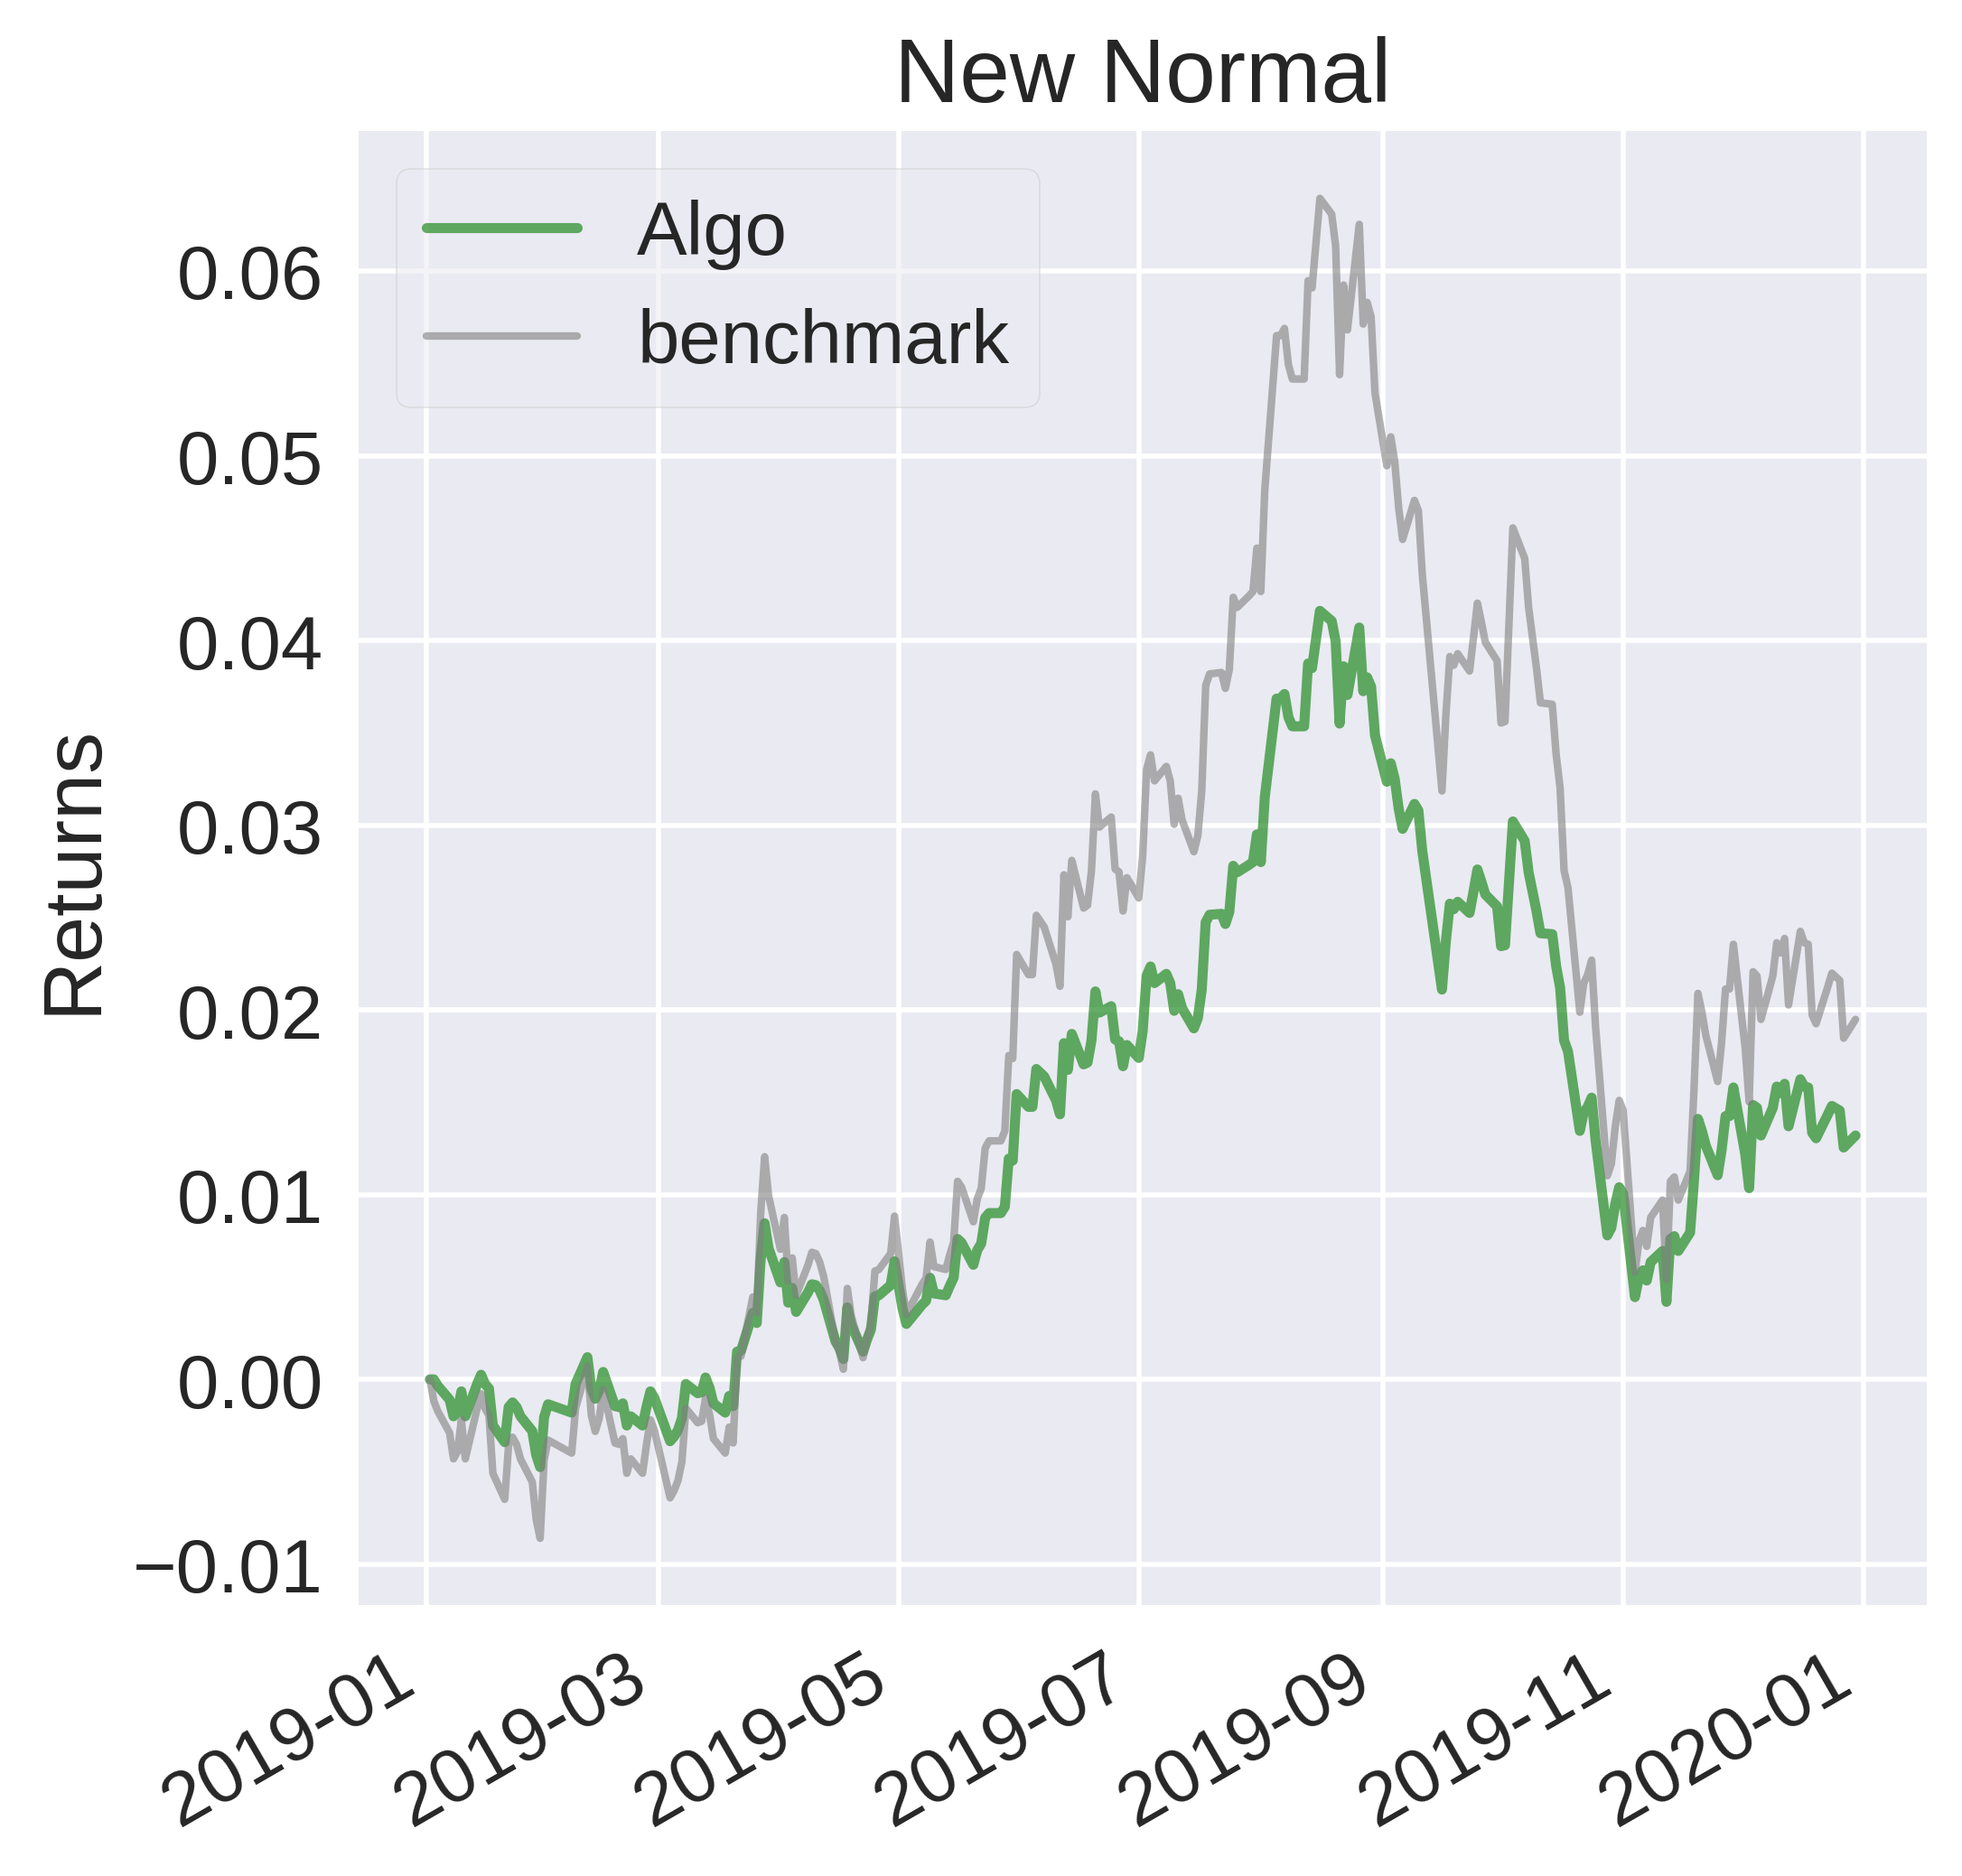

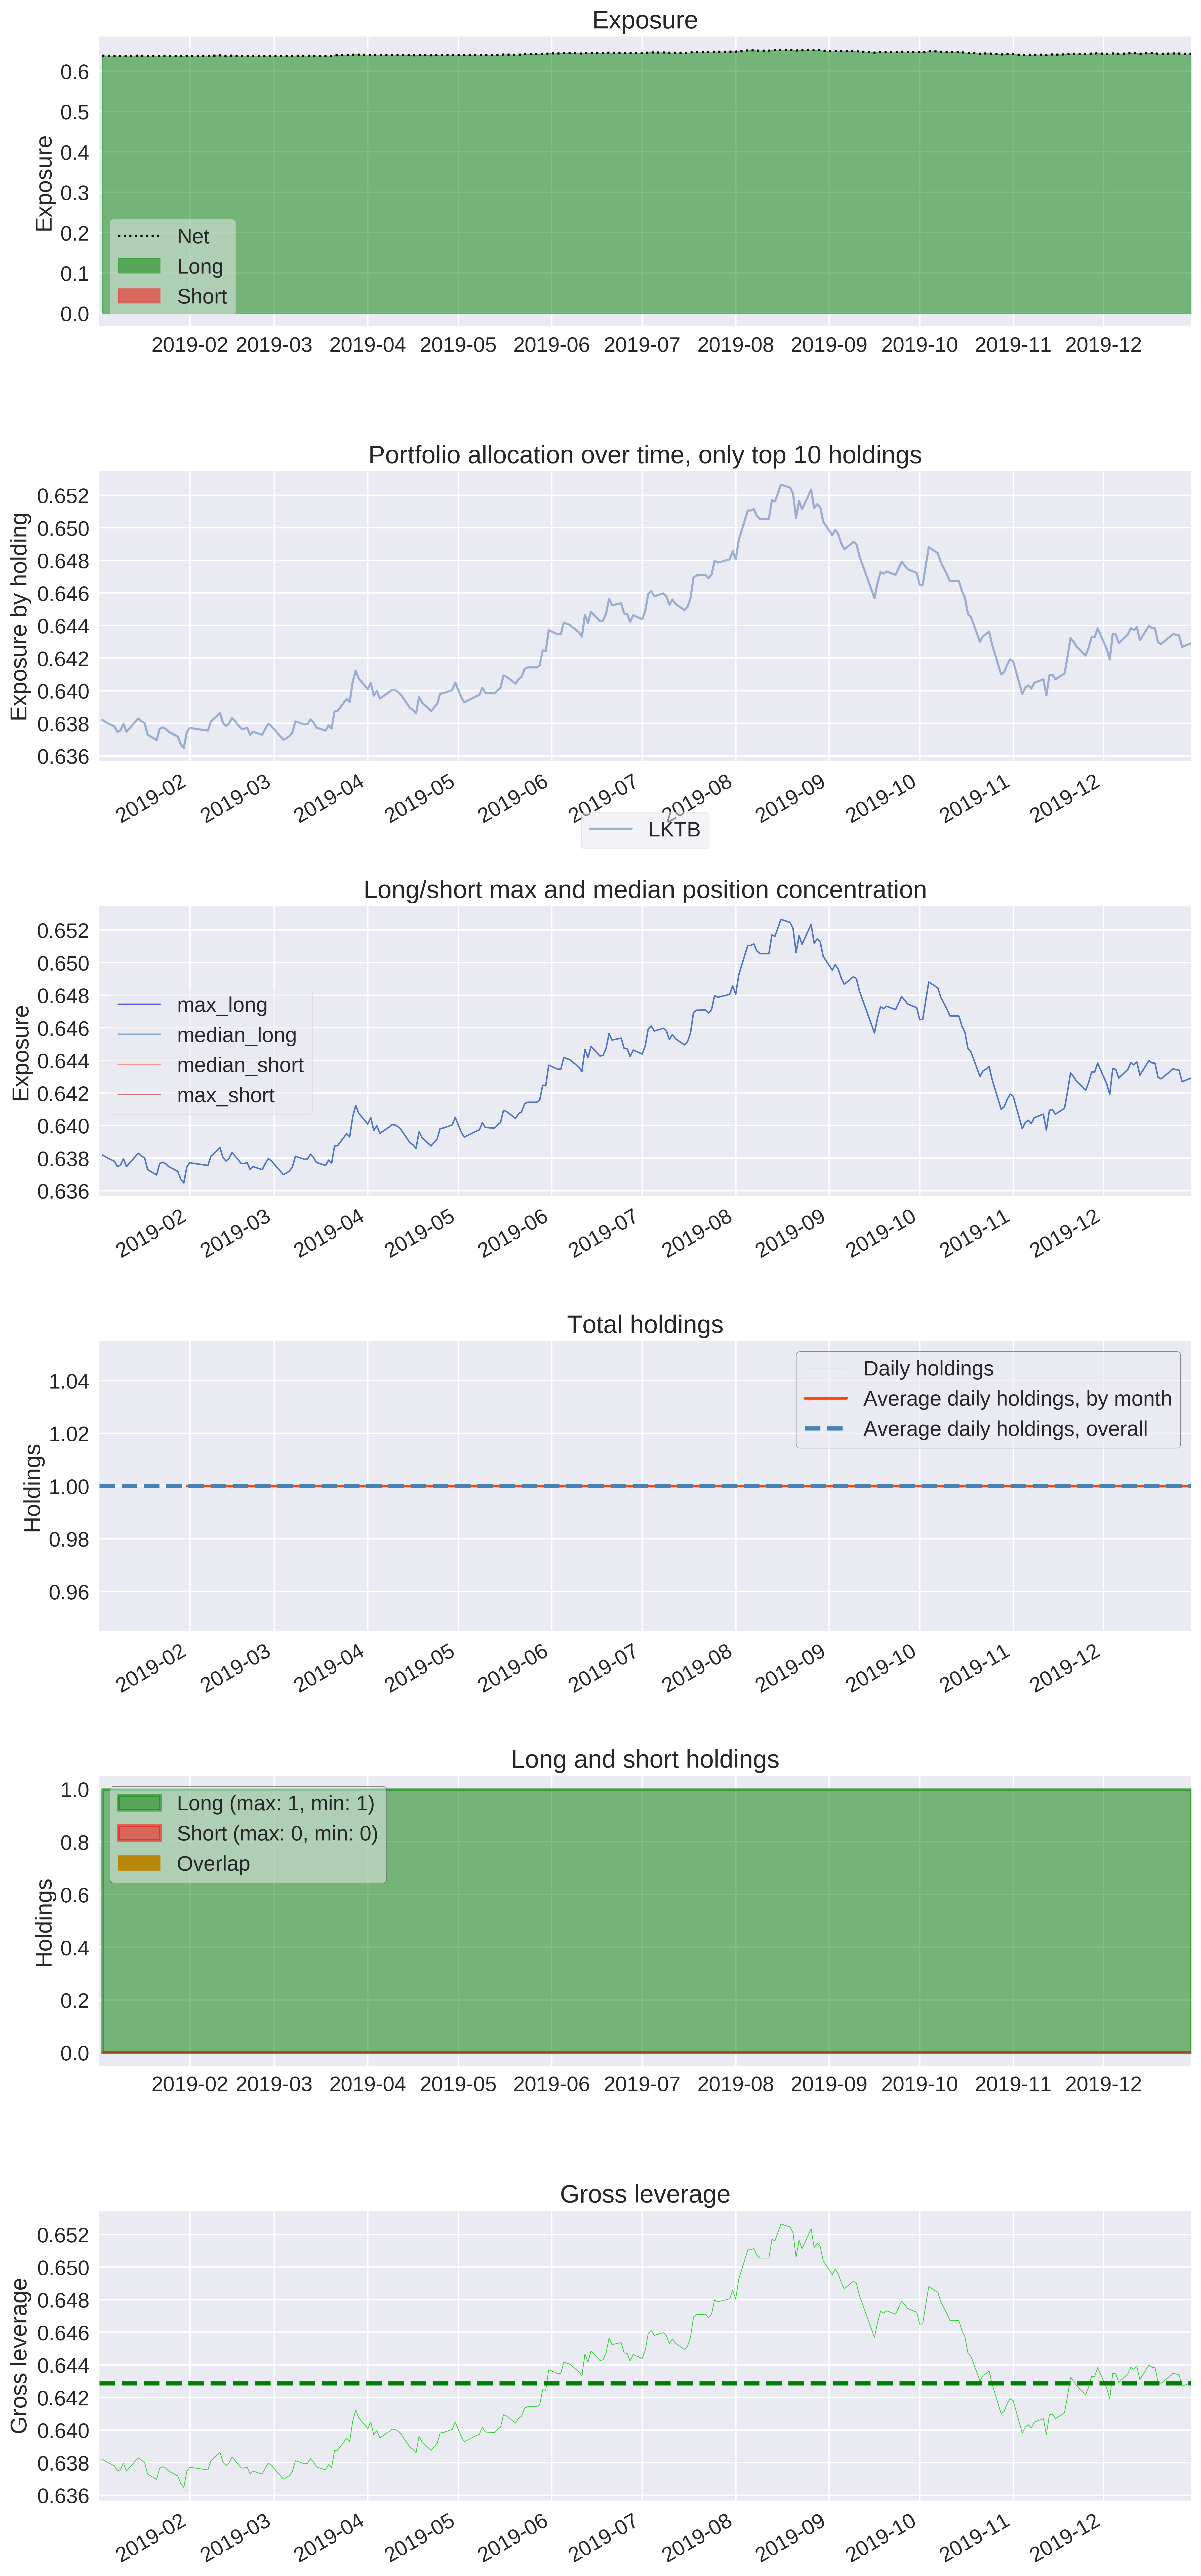

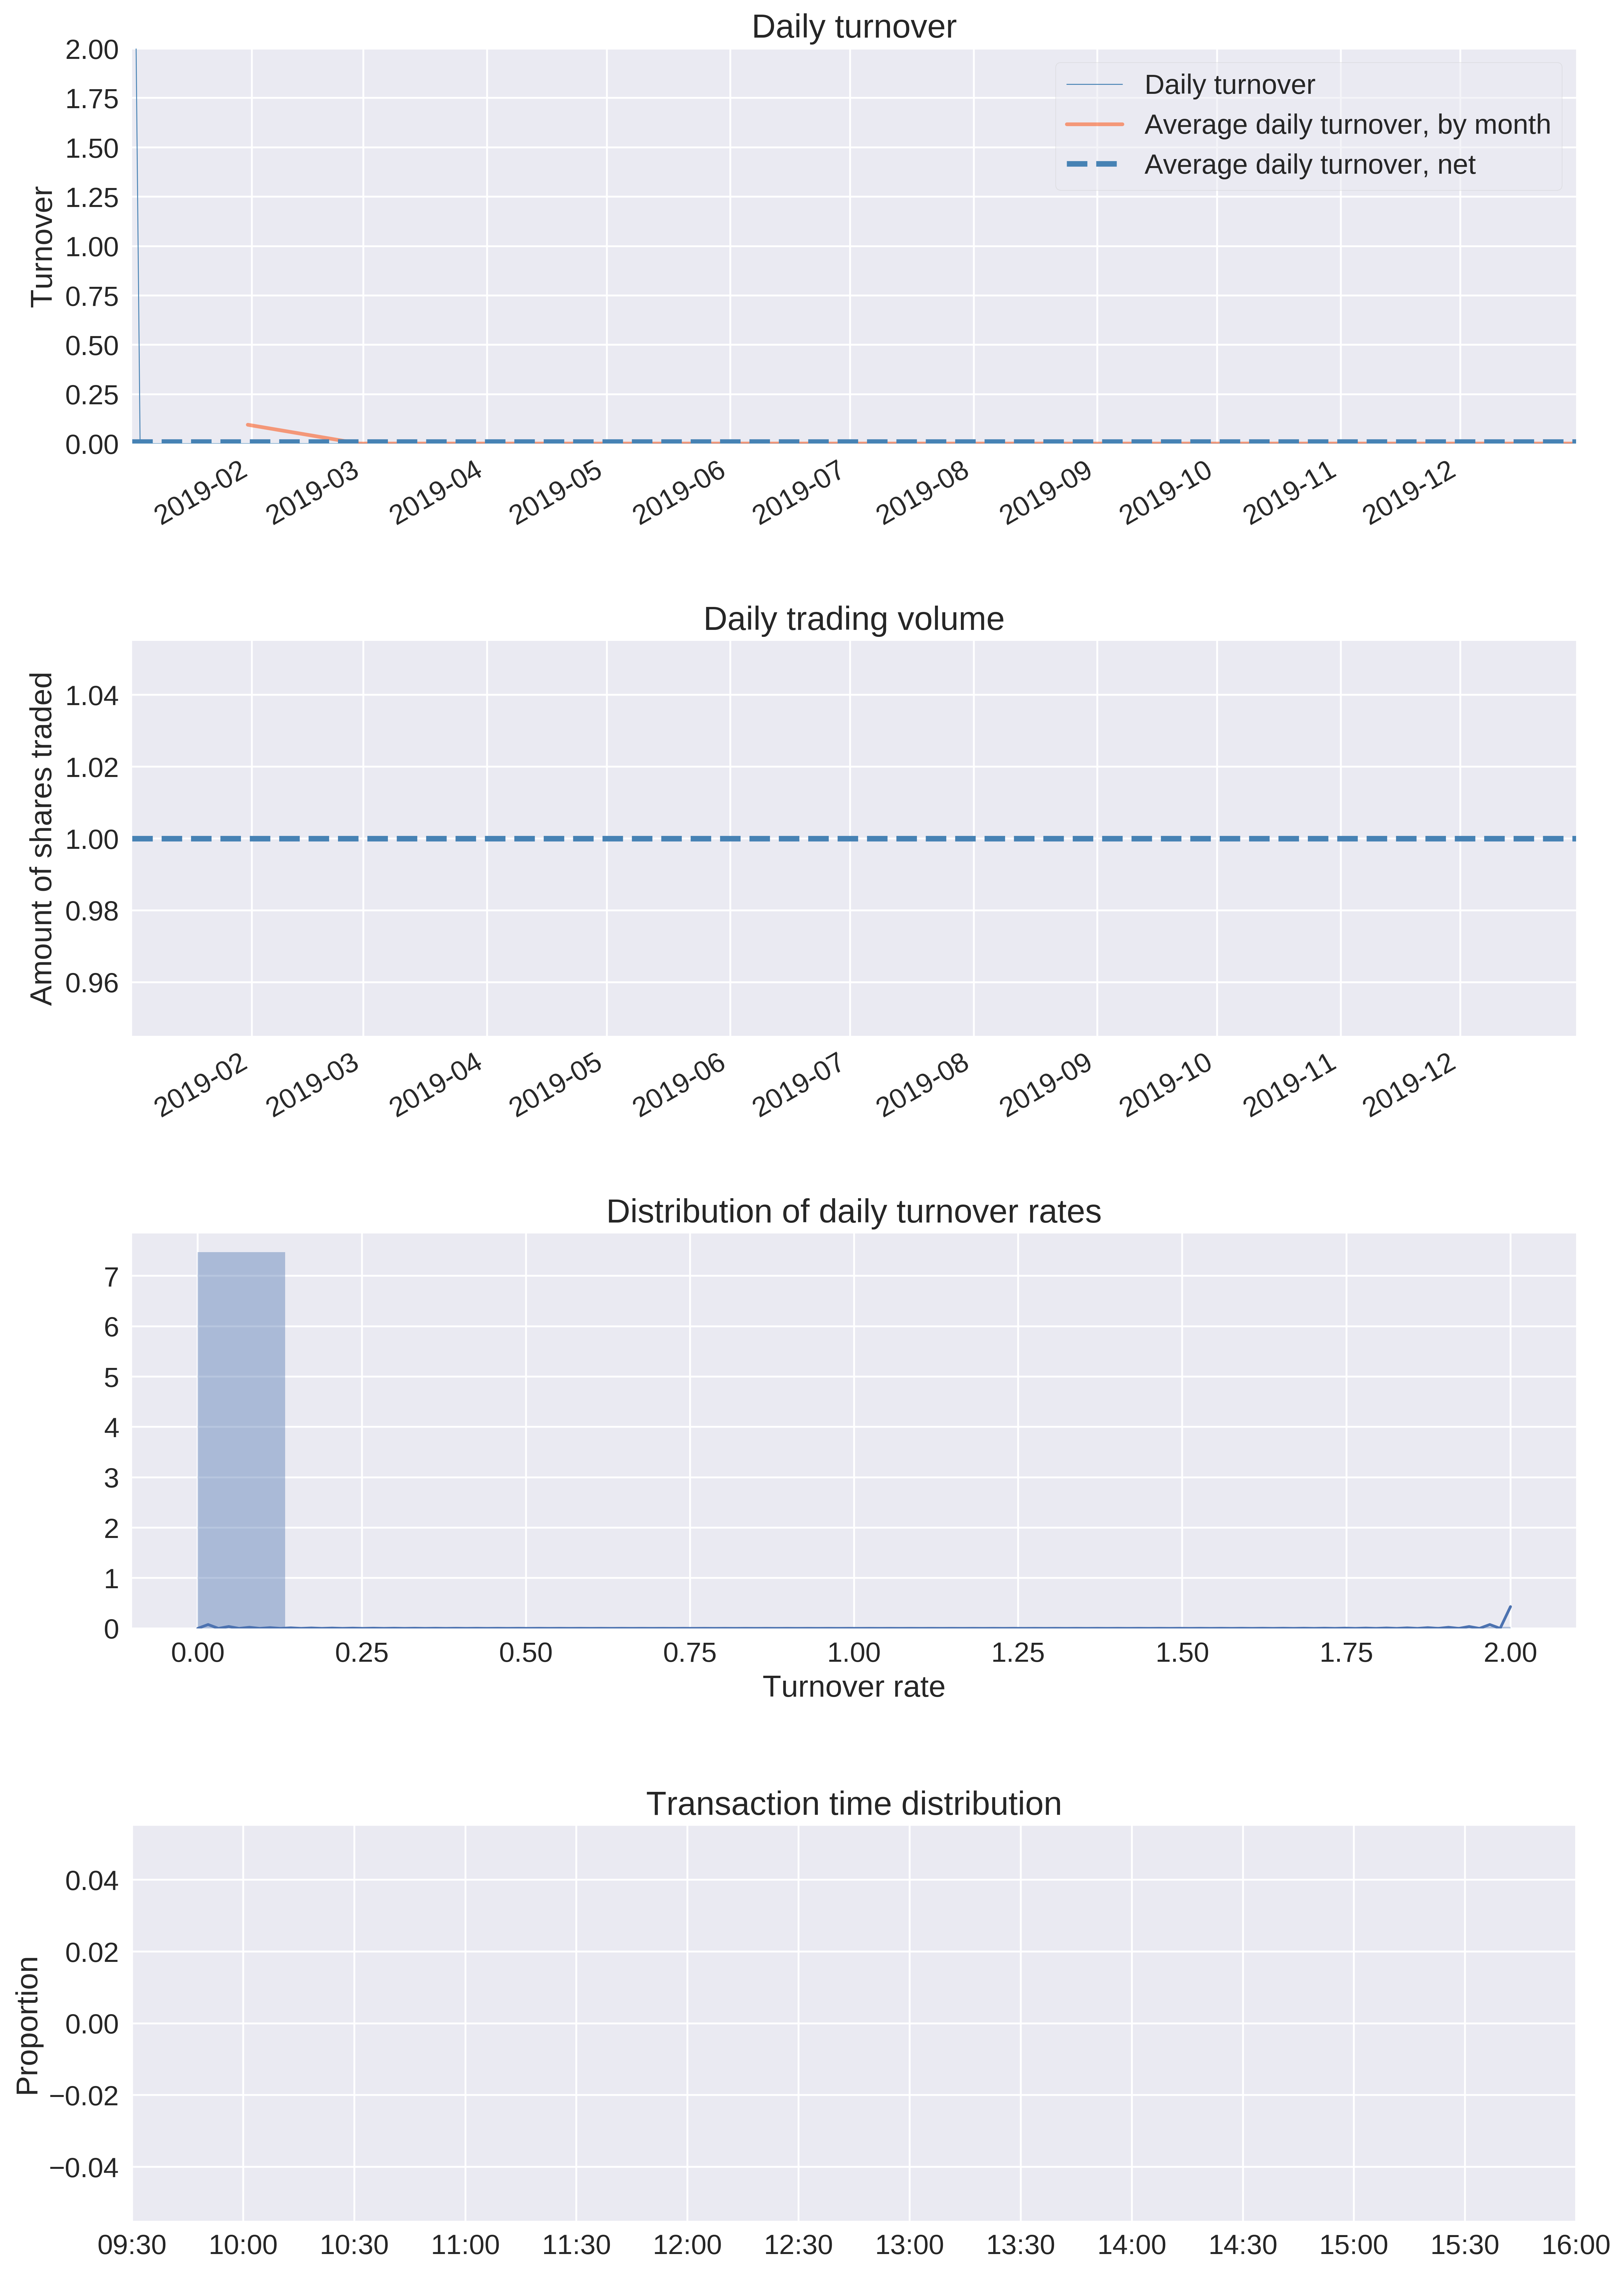

In [10]:
import pyfolio as pf
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(zl_basic)
benchmark_period_return = zl_basic['benchmark_period_return']
# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1
sheets = pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

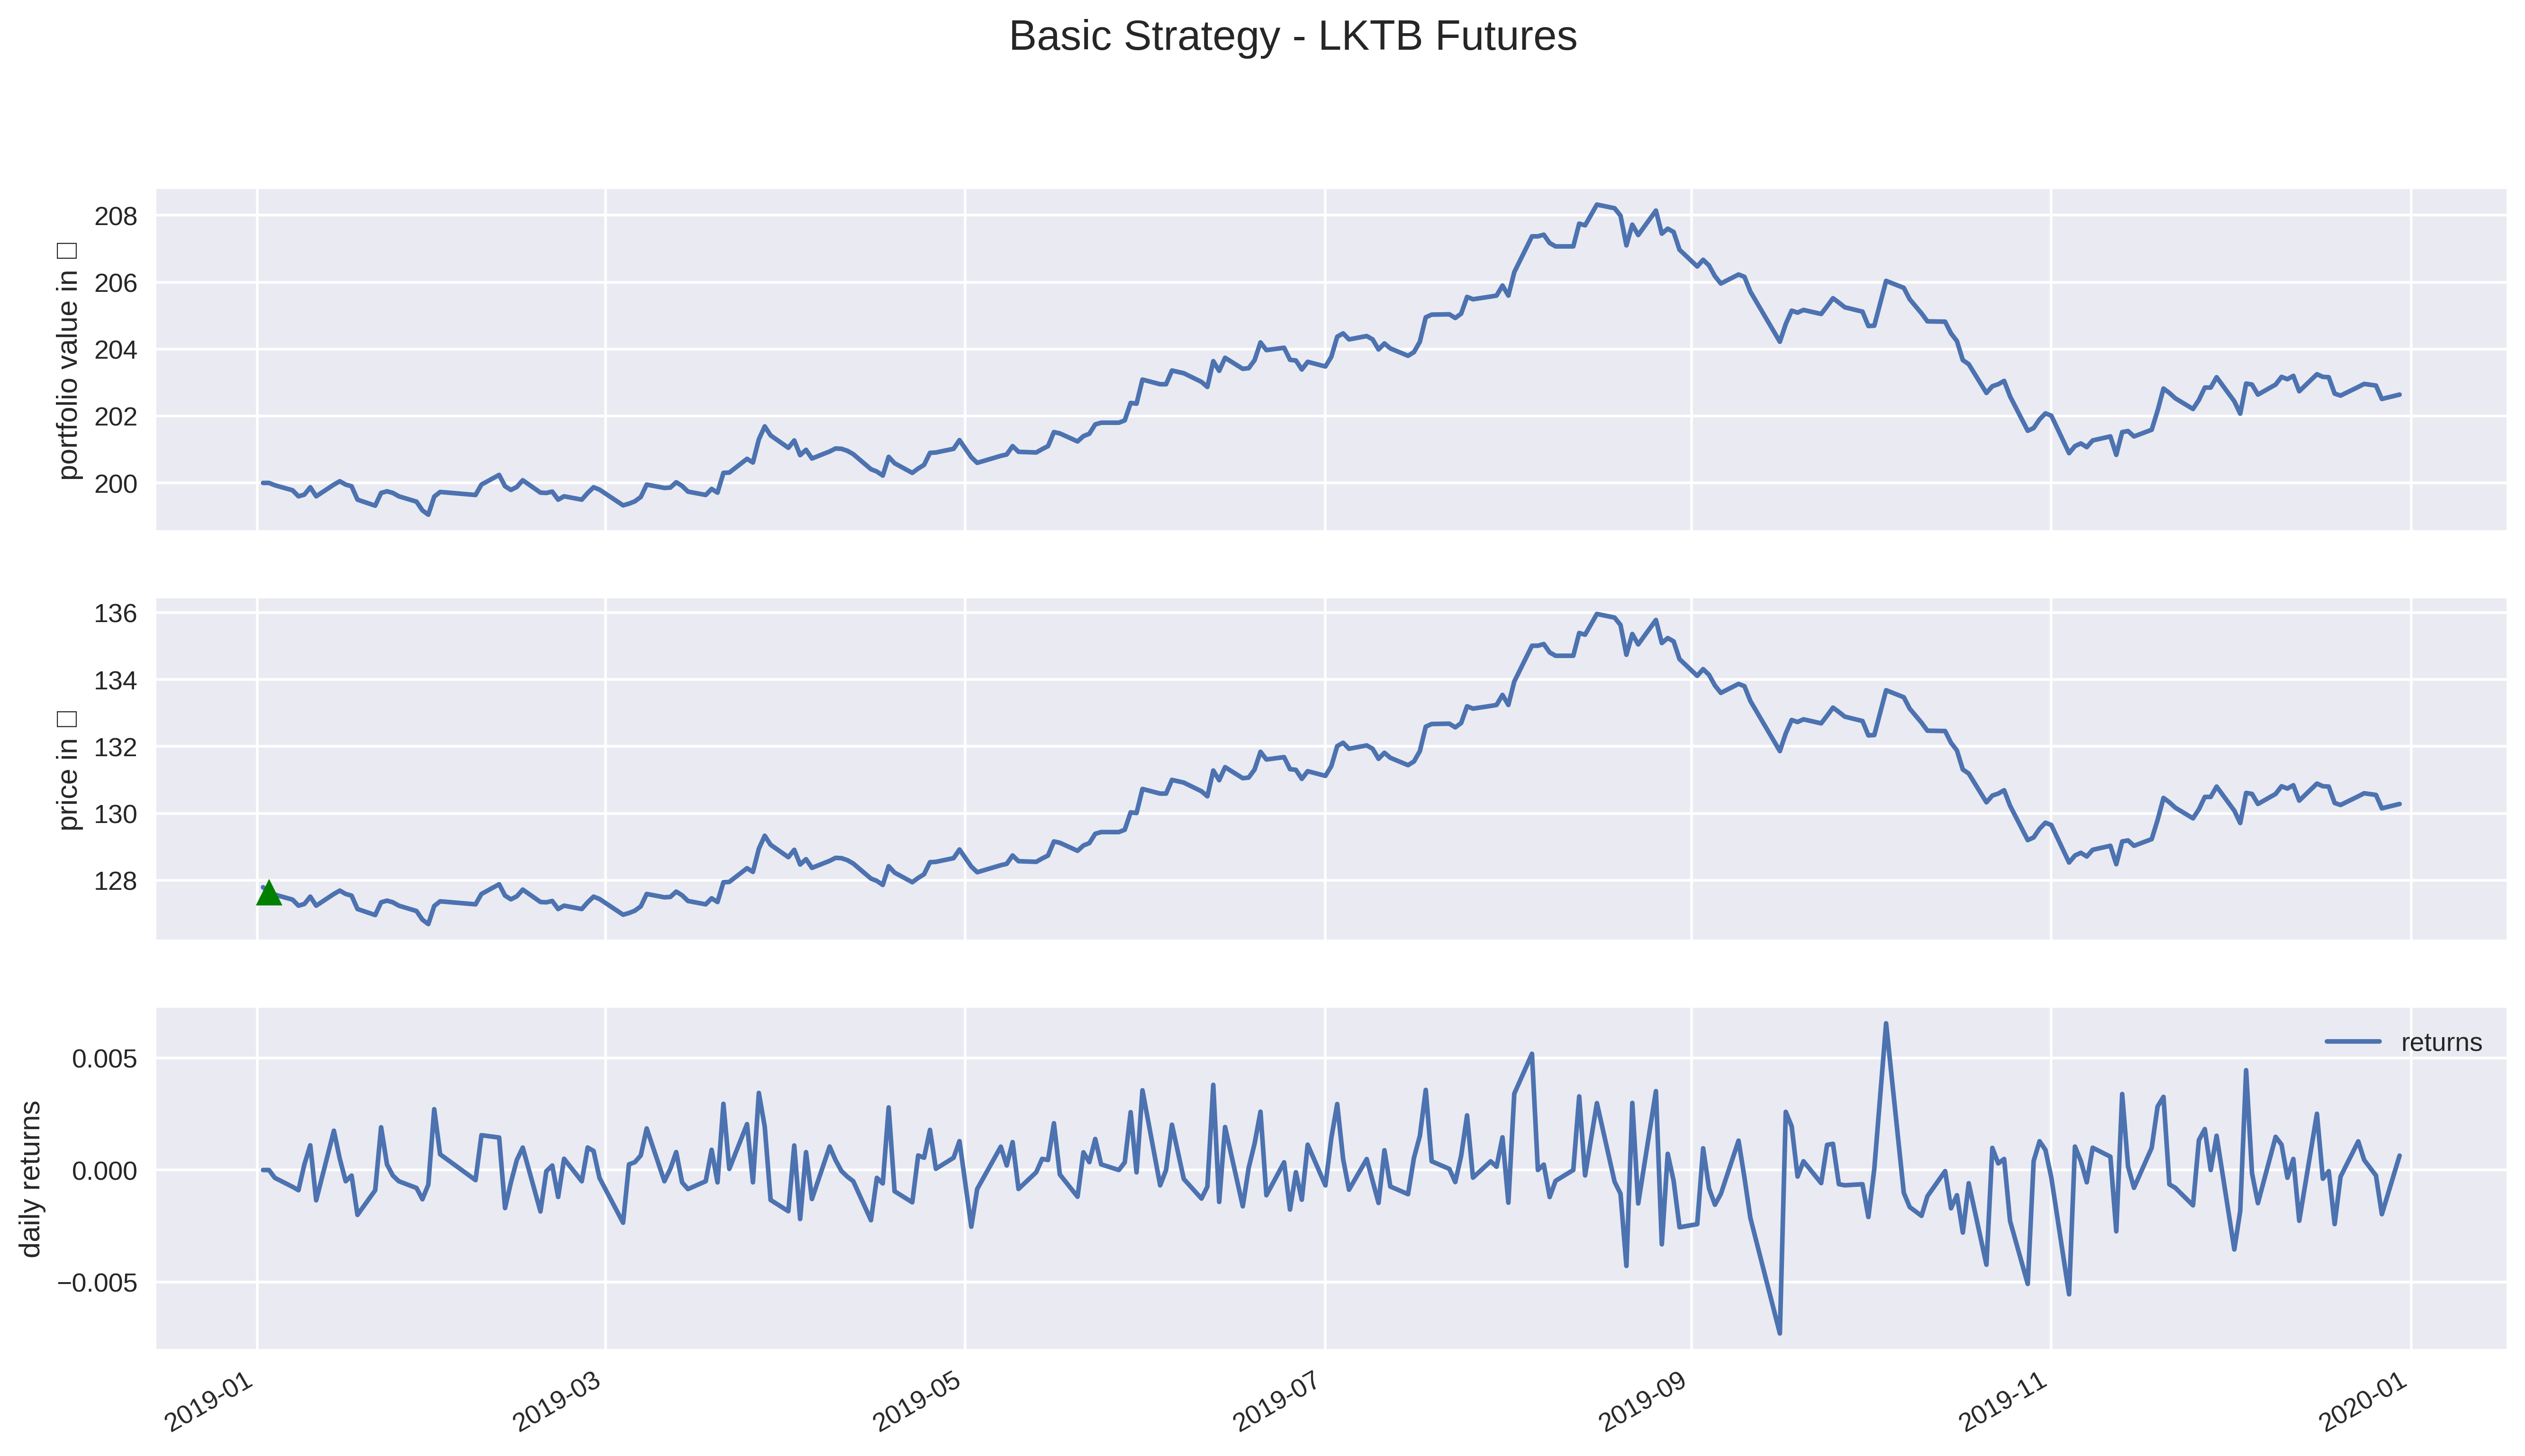

Final portfolio value (including cash): 202.64￦


In [11]:
# import helper functions 
import qf_helper_functions as qf

qf.visualize_results(zl_basic, 'Basic Strategy - LKTB Futures', '￦')

In [12]:
returns

2019-01-02 00:00:00+00:00    0.000000
2019-01-03 00:00:00+00:00    0.000000
2019-01-04 00:00:00+00:00   -0.000350
2019-01-07 00:00:00+00:00   -0.000750
2019-01-08 00:00:00+00:00   -0.000901
2019-01-09 00:00:00+00:00    0.000251
2019-01-10 00:00:00+00:00    0.001102
2019-01-11 00:00:00+00:00   -0.001351
2019-01-14 00:00:00+00:00    0.001754
2019-01-15 00:00:00+00:00    0.000500
2019-01-16 00:00:00+00:00   -0.000500
2019-01-17 00:00:00+00:00   -0.000250
2019-01-18 00:00:00+00:00   -0.002001
2019-01-21 00:00:00+00:00   -0.000902
2019-01-22 00:00:00+00:00    0.001906
2019-01-23 00:00:00+00:00    0.000250
2019-01-24 00:00:00+00:00   -0.000250
2019-01-25 00:00:00+00:00   -0.000501
2019-01-28 00:00:00+00:00   -0.000802
2019-01-29 00:00:00+00:00   -0.001304
2019-01-30 00:00:00+00:00   -0.000653
2019-01-31 00:00:00+00:00    0.002713
2019-02-01 00:00:00+00:00    0.000701
2019-02-07 00:00:00+00:00   -0.000451
2019-02-08 00:00:00+00:00    0.001553
2019-02-11 00:00:00+00:00    0.001450
2019-02-12 0

In [13]:
import pyfolio as pf

# possible additional summary statistics
pf.create_simple_tear_sheet(buy_and_hold_results.returns)

NameError: name 'buy_and_hold_results' is not defined

In [ ]:
buy_and_hold_perf = qf.get_performance_summary(buy_and_hold_results.returns)

### Simple Moving Average Strategy

In [ ]:
%%zipline --start 2019-1-2 --end 2019-12-30 --capital-base 10000 --bundle krx_futures -o simple_moving_average.pkl --trading-calendar XKRX

# imports 
from zipline.api import order_percent, record, symbol, order_target
from zipline.finance import commission

# parameters 
MA_PERIODS = 20
SELECTED_STOCK = 'LKTB'

def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False

def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=MA_PERIODS, frequency="1d")
    ma = price_history.mean()
    
    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           moving_average=ma)

In [ ]:
sma_results = pd.read_pickle('simple_moving_average.pkl')
qf.visualize_results(sma_results, 'Simple Moving Average Strategy - LKTB Futures', '￦')

In [ ]:
fig, ax = plt.subplots()

# asset
sma_results[['price', 'moving_average']].plot(ax=ax)
ax.set_ylabel('price in ￦')

# mark transactions
perf_trans = sma_results.loc[[t != [] for t in sma_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, sma_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, sma_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('Simple Moving Average Strategy - LKTB Futures', fontsize=16)
plt.legend()
plt.show()

In [ ]:
sma_perf = qf.get_performance_summary(sma_results.returns)

In [ ]:
%%zipline --start 2019-1-2 --end 2019-12-30 --capital-base 10000 --bundle krx_futures -o moving_average_crossover.pkl --trading-calendar XKRX

# imports 
from zipline.api import order_percent, record, symbol, order_target
from zipline.finance import commission

# parameters 
SELECTED_STOCK = 'LKTB'
SLOW_MA_PERIODS = 100
FAST_MA_PERIODS = 20

def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):

    fast_ma = data.history(context.asset, 'price', bar_count=FAST_MA_PERIODS, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=SLOW_MA_PERIODS, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)

In [ ]:
mac_results = pd.read_pickle('moving_average_crossover.pkl')
qf.visualize_results(mac_results, 'Moving Average Crossover Strategy - LKTB Futures', '￦')

In [ ]:
fig, ax = plt.subplots()

# asset
mac_results[['price', 'fast_ma', 'slow_ma']].plot(ax=ax)
ax.set_ylabel('price in KRW')

# mark transactions
perf_trans = mac_results.loc[[t != [] for t in mac_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, mac_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, mac_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('Moving Average Crossover Strategy - LKTB Futures', fontsize=16)
plt.legend()
plt.show()

In [ ]:
mac_perf = qf.get_performance_summary(mac_results.returns)

### MACD

In [ ]:
%%zipline --start 2019-1-2 --end 2019-12-30 --capital-base 10000 --bundle krx_futures -o macd.pkl --trading-calendar XKRX

# imports ----
from zipline.api import order_target, record, symbol, set_commission, order_percent
import matplotlib.pyplot as plt
import talib as ta
from zipline.finance import commission

# parameters ----
SELECTED_STOCK = 'LKTB'

 #initialize the strategy 
def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=34, frequency="1d")
    macd, macdsignal, macdhist = ta.MACD(price_history, 12, 26, 9) 
    
    if (macdsignal[-1] < macd[-1]) and (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
        
    if (macdsignal[-1] > macd[-1]) and (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False
        
    record(macd =  macd[-1], macdsignal = macdsignal[-1], macdhist = macdhist[-1], price=price_history[-1]) 

In [ ]:
macd_results = pd.read_pickle('macd.pkl')
qf.visualize_results(macd_results, 'MACD Strategy - LKTB Futures', '￦')

In [ ]:
fig, ax = plt.subplots()

# asset
macd_results[['macd', 'macdsignal']].plot(ax=ax)
ax.set_ylabel('price in ￦')

# mark transactions
perf_trans = macd_results.loc[[t != [] for t in macd_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, macd_results.macd.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, macd_results.macd.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('MACD Strategy - LKTB Futures', fontsize=16)
plt.show()

In [ ]:
macd_perf = qf.get_performance_summary(macd_results.returns)

### RSI

In [ ]:
%%zipline --start 2019-1-2 --end 2019-12-30 --capital-base 10000 --bundle krx_futures -o rsi.pkl --trading-calendar XKRX

# imports ----
from zipline.api import order_target, record, symbol, set_commission, order_percent
import matplotlib.pyplot as plt
import talib as ta
from zipline.finance import commission

# parameters ----
SELECTED_STOCK = 'LKTB'
UPPER = 70
LOWER = 30
RSI_PERIOD = 14

#initialize the strategy 
def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=RSI_PERIOD+1, frequency="1d")
    rsi = ta.RSI(price_history, timeperiod=RSI_PERIOD)
    
    if rsi[-1] < LOWER and not context.has_position:
        order_percent(context.asset, 1.0)
        context.has_position = True
      
    if rsi[-1] > UPPER and context.has_position:
        order_target(context.asset, 0)
        context.has_position = False
     
    record(rsi=rsi[-1], price=price_history[-1]) 

In [ ]:
rsi_results = pd.read_pickle('rsi.pkl')
qf.visualize_results(rsi_results, 'RSI Strategy - LKTB Futures', '￦')

In [ ]:
#fig, ax = plt.subplots(1, 1, sharex=True, figsize=[16, 9])
fig, ax = plt.subplots()

# asset
rsi_results[['rsi']].plot(ax=ax)
ax.axhline(y=70, color='r')
ax.axhline(y=30, color='g')

# mark transactions
perf_trans = rsi_results.loc[[t != [] for t in rsi_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, rsi_results.rsi.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, rsi_results.rsi.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('RSI Strategy - LKTB Futures', fontsize=16)
plt.show()

In [ ]:
rsi_perf = qf.get_performance_summary(rsi_results.returns)

## Evaluating the performance

In [ ]:
perf_df = pd.DataFrame({'Buy and Hold': buy_and_hold_perf,
                        'Simple Moving Average': sma_perf,
                        'Moving Average Crossover': mac_perf,
                        'MACD': macd_perf,
                        'RSI': rsi_perf})
perf_df.transpose()